In [1]:
import numpy as np
import os
from functools import reduce
import pandas as pd

import matplotlib.pyplot as plt

# 设置文字、字体
from pylab import *  # 支持中文

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体以便支持中文
# mpl.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True

# mpl.rcParams['font.size'] = 12
font = {'family': 'SimHei',
        'weight': 'normal',
        'size': 10}

font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 12}
font_leng = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 10}

import warnings

warnings.filterwarnings('ignore')  # 取消警告


In [2]:
def polt_line(axes,  # 图块
              x,  # x轴数据
              y,  # y轴数据
              label,  # 曲线标签
              x_label=None,  # x轴标签
              x_tickslabel=None,  # x轴刻度标签
              y_label=None,  # y轴标签
              y_tickslabel=None,  # y轴刻度标签
              xlims=None,  # x轴范围
              ylims=None,  # y轴范围
              title=None,  # 图片标题
              point=None,  # 点的形状
              color=None):  # 颜色
    if xlims: axes.set_xlim(xlims[0], xlims[1])
    if ylims: axes.set_ylim(ylims[0], ylims[1])
    if y_label: axes.set_ylabel(y_label, font)  # font调整字体
    if x_label: axes.set_xlabel(x_label, font1)

    axes.set_xticks(x)

    if x_tickslabel: axes.set_xticklabels(x_tickslabel, font)
    if y_tickslabel: axes.set_yticklabels(y_tickslabel, font)
    if title: axes.set_title(title, font)

    axes.grid(axis="y")

    bwith = 1  # 图边框粗细
    bcolor = 'black'  # 图边框颜色
    axes.spines['bottom'].set_linewidth(bwith)
    axes.spines['left'].set_linewidth(bwith)
    axes.spines['top'].set_linewidth(bwith)
    axes.spines['right'].set_linewidth(bwith)
    axes.spines['bottom'].set_color(bcolor)
    axes.spines['left'].set_color(bcolor)
    axes.spines['top'].set_color(bcolor)
    axes.spines['right'].set_color(bcolor)
    #     print(ylims)
    #     if text: axes.text(text_axis[0], text_axis[1], text, ha='left', size=14, color="k", weight="light", bbox=dict(facecolor="w", alpha=0.1))

    axes.plot(x, y, point,
              linestyle='-',
              label=label,
              color=color,
              markerfacecolor=color,  # 点颜色
              ms=7,  # 点大小
              linewidth=1.,  # 线宽度
              markeredgecolor='white')  # 点轮廓线
    #         all_axes[i].plot(x, all_datas['enhance'][cdm], label=cdms[j], color=colors[j], markerfacecolor='none', ms=3, linewidth=0.9)
    #         all_axes[i].legend()


In [3]:
datasets = ['Cora', 'Citeseer', 'Pubmed']

cora_auc = [0.9747, 0.9669, 0.9257, 0.9240, 0.9209, 0.9214, 0.9255, 0.9226, 0.9247]
cora_ap = [0.9754, 0.9659, 0.9185, 0.9117, 0.9115, 0.9100, 0.9126, 0.9141, 0.9110]

citeseer_auc = [0.9875, 0.9812, 0.9629, 0.9552, 0.9540, 0.9538, 0.9422, 0.9321, 0.9324]
citeseer_ap = [0.9881, 0.9795, 0.9613, 0.9550, 0.9533, 0.9487, 0.9354, 0.9203, 0.9245]

pubmed_auc = [0.9399, 0.9422, 0.9051, 0.8971, 0.9014, 0.8824, 0.8908, 0.8847, 0.8767]
pubmed_ap = [0.9435, 0.9388, 0.8965, 0.8897, 0.8999, 0.8688, 0.8803, 0.8731, 0.8593]

data_auc = [cora_auc, citeseer_auc, pubmed_auc]
data_ap = [cora_ap, citeseer_ap, pubmed_ap]

# 定义其他信息
x = np.arange(1, 10, 1)
xlims = (0, 11)
x_ticks_list = np.arange(2, 11).tolist()
y_ticks_list = ['0.79', '0.82', '0.85', '0.88', '0.91', '0.94', '0.97', '1.00']
y_lims = [0.84, 1.00]

x_label = 'Number of sampled neighbors\n in hop 1 for each node ' + r'$(K_1)$'
y_label = 'Metric'

metric_list = ['AUC', 'AP']
colors = ['purple', '#E5AE48', 'blue']
points = ['o-', 'P-', 's-', '^-', 'x-']

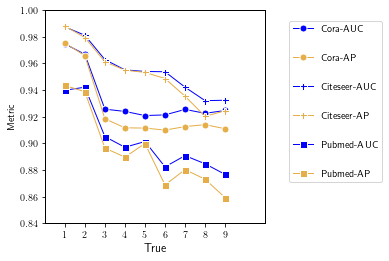

In [4]:
# 画图

fig_1, all_axes_1 = plt.subplots(1, 1, figsize=(4, 4))

# plt.style.use("bmh")
labels = [('Cora-AUC', 'Cora-AP'), ('Citeseer-AUC', 'Citeseer-AP'), ('Pubmed-AUC', 'Pubmed-AP')]

for i in range(len(datasets)):
    polt_line(axes=all_axes_1, x=x, y=data_auc[i], label=labels[i][0], x_label=True, y_label='Metric', y_tickslabel=None,
              ylims=y_lims, xlims=xlims, point=points[i], color=colors[2])
    polt_line(axes=all_axes_1, x=x, y=data_ap[i], label=labels[i][1], x_label=True, y_label='Metric', y_tickslabel=None,
              ylims=y_lims, xlims=xlims, point=points[i], color=colors[1])

plt.tight_layout(pad=1.5, h_pad=0.18, w_pad=0.26, rect=None)
plt.subplots_adjust(top=0.9, bottom=0.16, hspace=0.12, wspace=0.26)
plt.legend(bbox_to_anchor=(-0.47, 0.6, 2.0, .35), loc='best',
           ncol=1, mode="", borderaxespad=0., prop=font, labelspacing=2)
plt.savefig('image/line.pdf', bbox_inches='tight')

plt.show()
